<a href="https://colab.research.google.com/github/cabbles/scrv/blob/main/small_model_halu_rates.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
import pandas as pd

# https://huggingface.co/spaces/vectara/leaderboard
halu_rates = pd.read_csv('/content/drive/My Drive/model_halu_rates_HHEM.csv')

halu_rates.head()

,LLM,Hallucination %,Answer %,Avg Summary Words
0,google/gemini-2.0-flash-001,0.700,100.0,65.200
1,openai/o3-mini-high-reasoning,0.795,100.0,79.519
2,google/gemini-2.0-pro-exp-02-05,0.800,99.7,61.500
3,google/gemini-2.5-pro-exp-03-25,1.100,95.1,72.900
4,openai/gpt-4.5-preview,1.200,100.0,77.000


In [4]:
!pip install huggingface_hub

In [7]:
from huggingface_hub import model_info

model = model_info('meta-llama/Llama-2-7b-hf')

print(model)

ModelInfo(id='meta-llama/Llama-2-7b-hf', author='meta-llama', sha='01c7f73d771dfac7d292323805ebc428287df4f9', created_at=datetime.datetime(2023, 7, 13, 16, 16, 13, tzinfo=datetime.timezone.utc), last_modified=datetime.datetime(2024, 4, 17, 8, 40, 16, tzinfo=datetime.timezone.utc), private=False, disabled=False, downloads=597899, downloads_all_time=None, gated='manual', gguf=None, inference=None, inference_provider_mapping=None, likes=2100, library_name='transformers', tags=['transformers', 'pytorch', 'safetensors', 'llama', 'text-generation', 'facebook', 'meta', 'llama-2', 'en', 'arxiv:2307.09288', 'license:llama2', 'autotrain_compatible', 'text-generation-inference', 'endpoints_compatible', 'region:us'], pipeline_tag='text-generation', mask_token=None, card_data={'base_model': None, 'datasets': None, 'eval_results': None, 'language': ['en'], 'library_name': None, 'license': 'llama2', 'license_name': None, 'license_link': None, 'metrics': None, 'model_name': None, 'pipeline_tag': 'text

In [21]:
import re

In [47]:
def to_num(s):
  if isinstance(s, (int, float)):
        return s
  s = str(s).strip().upper()
  if 'B' in s:
        return float(s.replace('B', '')) * 1_000_000_000
  elif 'M' in s:
        return float(s.replace('M', '')) * 1_000_000
  else:
        return float(s)


In [48]:
tags, configs = [], []
param_sizes = []

for llm in halu_rates['LLM']:
  try:
    model = model_info(llm)
    tags.append(model.tags)
    configs.append(model.config)
    ps_found = False
    for tag in model.tags:
      match = re.search(r'\b(\d+\.?\d*)(B|M|b|m)\b', tag, re.IGNORECASE)
      if match:
        param_sizes.append(to_num(f'{match.group(1)}{match.group(2).upper()}'))
        ps_found = True
        break
    if not ps_found:
      param_sizes.append('unknown')
  except Exception:
    tags.append('unknown')
    configs.append('unknown')
    param_sizes.append('unknown')

In [53]:
print(tags[:15])
print(configs[:15])

[['transformers', 'safetensors', 'qwen3', 'text-generation', 'conversational', 'arxiv:2309.00071', 'arxiv:2505.09388', 'base_model:Qwen/Qwen3-14B-Base', 'base_model:finetune:Qwen/Qwen3-14B-Base', 'license:apache-2.0', 'autotrain_compatible', 'text-generation-inference', 'endpoints_compatible', 'region:us'], ['transformers', 'pytorch', 'safetensors', 'mistral', 'text-generation', 'LLMs', 'math', 'Intel', 'conversational', 'arxiv:2309.12284', 'base_model:Intel/neural-chat-7b-v3-1', 'base_model:finetune:Intel/neural-chat-7b-v3-1', 'license:apache-2.0', 'model-index', 'autotrain_compatible', 'text-generation-inference', 'endpoints_compatible', 'region:us'], ['transformers', 'safetensors', 'qwen3', 'text-generation', 'conversational', 'arxiv:2309.00071', 'arxiv:2505.09388', 'base_model:Qwen/Qwen3-4B-Base', 'base_model:finetune:Qwen/Qwen3-4B-Base', 'license:apache-2.0', 'autotrain_compatible', 'text-generation-inference', 'endpoints_compatible', 'region:us'], ['transformers', 'safetensors', 

In [52]:
param_sizes[:20]

[14000000000.0,
 7000000000.0,
 4000000000.0,
 12000000000.0,
 7000000000.0,
 8000000000.0,
 32000000000.0,
 24000000000.0,
 600000000.0,
 4000000000.0,
 405000000000.0,
 70000000000.0,
 14000000000.0,
 7000000000.0,
 72000000000.0,
 1700000000.0,
 72000000000.0,
 32000000000.0,
 70000000000.0,
 1000000000.0]

In [56]:
halu_rates['param sizes'] = param_sizes

In [32]:
halu_rates = halu_rates[halu_rates['param sizes'] != 'unknown']

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

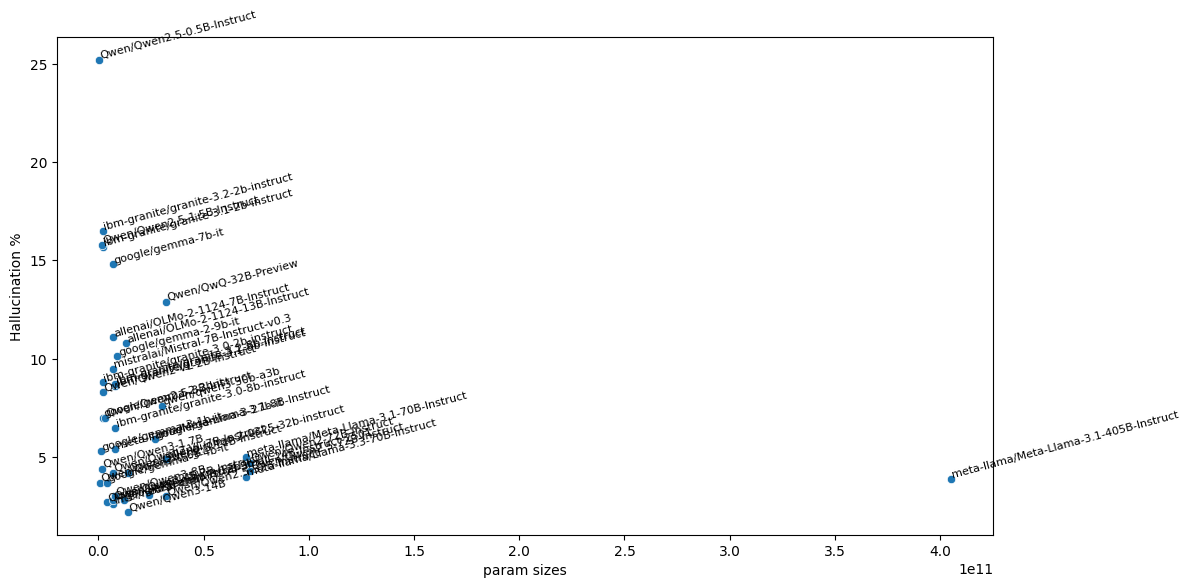

In [79]:
plt.figure(figsize = (12, 6))

sns.scatterplot(x = 'param sizes',
                y = 'Hallucination %',
                data = halu_rates)

for i, row in halu_rates.iterrows():
    plt.text(
        x = row['param sizes'] + 0.05,
        y = row['Hallucination %'] + 0.05,
        s = row['LLM'],
        fontsize = 8,
        rotation = 15,
        ha = 'left'
    )

plt.tight_layout()
plt.show()

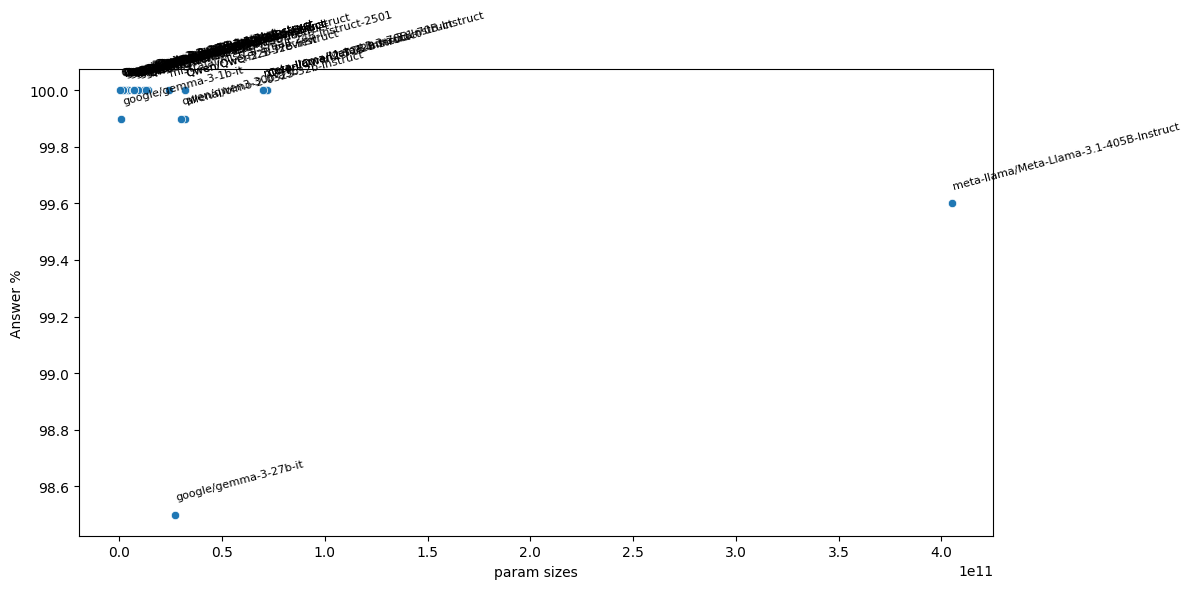

In [96]:
plt.figure(figsize = (12, 6))

sns.scatterplot(x = 'param sizes',
                y = 'Answer %',
                data = halu_rates)

for i, row in halu_rates.iterrows():
    plt.text(
        x = row['param sizes'] + 0.05,
        y = row['Answer %'] + 0.05,
        s = row['LLM'],
        fontsize = 8,
        rotation = 15,
        ha = 'left'
    )

plt.margins(x = 0.05, y = 0.05)
plt.tight_layout()
plt.show()

In [89]:
halu_rates.sort_values(by = 'Hallucination %',
                       ascending = True)
halu_rates

,LLM,Hallucination %,Answer %,Avg Summary Words,param sizes
23,Qwen/Qwen3-14B,2.200,100.0,82.400,1.400000e+10
32,Intel/neural-chat-7b-v3-3,2.600,100.0,60.700,7.000000e+09
33,Qwen/Qwen3-4B,2.700,100.0,87.700,4.000000e+09
34,google/gemma-3-12b-it,2.800,100.0,69.600,1.200000e+10
35,Qwen/Qwen2.5-7B-Instruct,2.800,100.0,71.000,7.000000e+09
41,Qwen/Qwen3-8B,3.000,100.0,78.200,8.000000e+09
42,Qwen/Qwen2.5-32B-Instruct,3.000,100.0,67.900,3.200000e+10
43,mistralai/Mistral-Small-24B-Instruct-2501,3.082,100.0,74.933,2.400000e+10
50,Qwen/Qwen3-0.6B,3.700,100.0,65.300,6.000000e+08
51,google/gemma-3-4b-it,3.700,100.0,63.700,4.000000e+09


In [93]:
halu_rates.sort_values(by = 'Answer %',
                       ascending = False)
halu_rates

,LLM,Hallucination %,Answer %,Avg Summary Words,param sizes
23,Qwen/Qwen3-14B,2.200,100.0,82.400,1.400000e+10
32,Intel/neural-chat-7b-v3-3,2.600,100.0,60.700,7.000000e+09
33,Qwen/Qwen3-4B,2.700,100.0,87.700,4.000000e+09
34,google/gemma-3-12b-it,2.800,100.0,69.600,1.200000e+10
35,Qwen/Qwen2.5-7B-Instruct,2.800,100.0,71.000,7.000000e+09
41,Qwen/Qwen3-8B,3.000,100.0,78.200,8.000000e+09
42,Qwen/Qwen2.5-32B-Instruct,3.000,100.0,67.900,3.200000e+10
43,mistralai/Mistral-Small-24B-Instruct-2501,3.082,100.0,74.933,2.400000e+10
50,Qwen/Qwen3-0.6B,3.700,100.0,65.300,6.000000e+08
51,google/gemma-3-4b-it,3.700,100.0,63.700,4.000000e+09


In [95]:
halu_rates.sort_values(by = 'param sizes',
                       ascending = True)
halu_rates

,LLM,Hallucination %,Answer %,Avg Summary Words,param sizes
23,Qwen/Qwen3-14B,2.200,100.0,82.400,1.400000e+10
32,Intel/neural-chat-7b-v3-3,2.600,100.0,60.700,7.000000e+09
33,Qwen/Qwen3-4B,2.700,100.0,87.700,4.000000e+09
34,google/gemma-3-12b-it,2.800,100.0,69.600,1.200000e+10
35,Qwen/Qwen2.5-7B-Instruct,2.800,100.0,71.000,7.000000e+09
41,Qwen/Qwen3-8B,3.000,100.0,78.200,8.000000e+09
42,Qwen/Qwen2.5-32B-Instruct,3.000,100.0,67.900,3.200000e+10
43,mistralai/Mistral-Small-24B-Instruct-2501,3.082,100.0,74.933,2.400000e+10
50,Qwen/Qwen3-0.6B,3.700,100.0,65.300,6.000000e+08
51,google/gemma-3-4b-it,3.700,100.0,63.700,4.000000e+09
